# Exemplo de reamostragem das partículas

In [1]:
import numpy as np

import projeto_pf # Seu trabalho vai aqui
import inspercles
from pf import draw_random_sample

import sys
if (sys.version_info > (3, 0)):
    import importlib
    importlib.reload(projeto_pf) # Para garantir que o Jupyter sempre relê seu trabalho
else:
    reload(projeto_pf)

%matplotlib inline



Using scikit-learn to compute nearest neighbors


## Criação das partículas e do robô

In [2]:

particulas = projeto_pf.cria_particulas()
robot = projeto_pf.robot

    
    
    
    

## Mapa com posição inicial

Este desenho é só ilustrativo, você não vai precisar chamar o código de desenho no projeto. Somente precisa criar as funções adequadas em `projeto_pf.py`.

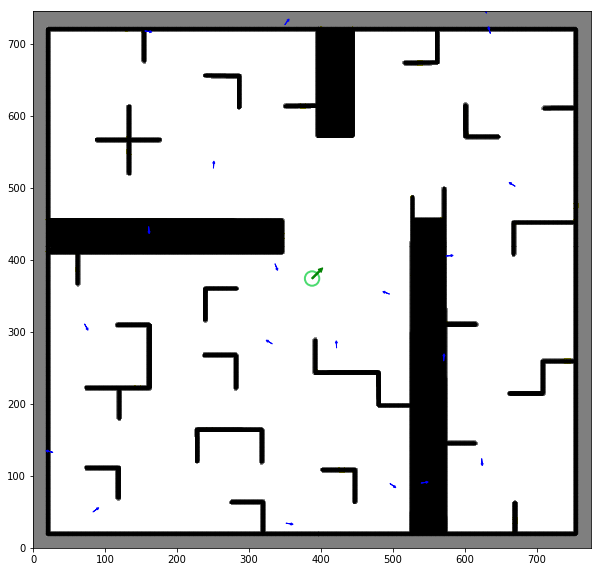

In [3]:
inspercles.nb_draw_map(inspercles.color_image, particles = particulas, pose=robot.pose(), robot=True)

Vamos tornar a distribuição de probabilidade nas partículas bem desequilibrada para observarmos a reamostragem

In [4]:
particulas[0].w = 0.8   # a primeira recebe 80% da probabilidade
for i in range(1, 10):
    particulas[i].w = 0.2/9.0 # As subsequentes 1/9 do que sobrou (20%)

In [5]:
# Vamos separar a informação de posição das partículas para que possamos "ver"  as partículas
particulas_exp = [[p.x, p.y, p.theta] for p in particulas]

particulas_pesos = [np.round(p.w, decimals=3) for p in particulas]

In [6]:
particulas_exp

[[495.68934897331104, 89.27820481981941, 5.669552267333036],
 [160.52671591337457, 446.1892814411902, 4.7871994731135095],
 [570.3178936968147, 259.4806379031715, 1.5207898670228392],
 [351.2932136247534, 34.21041171599592, 6.123493160678352],
 [669.5804237513539, 502.0980245476041, 2.5786185979191427],
 [538.8912950204262, 89.89663685960716, 0.15461287640609817],
 [421.4982764954813, 277.527329372285, 1.6055297219713969],
 [629.9599747781955, 742.6076498727017, 2.141607834855236],
 [495.10425828336264, 352.4112908154054, 2.785446810312359],
 [155.1104944627347, 717.8322136686967, 6.144806412375286],
 [27.444082956046188, 132.58326156940427, 2.905478108469042],
 [71.4781054909339, 310.9378131868582, 5.2141814361215495],
 [573.4867530372303, 405.22151492960336, 0.08603307448816917],
 [635.1587950426119, 714.2639579213775, 1.8596235701684718],
 [250.49593881848398, 527.15037732848, 1.5042322123017822],
 [83.17120834219543, 49.80971198656643, 0.6326014230507996],
 [623.0355013362787, 123.

Vejam como está a distribuição dos pesos

In [7]:
particulas_pesos

[0.8,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 0.022,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

## Fazendo a reamostragem

Vamos criar novas partículas reamostrando usando a função `pf.draw_random_sample`

In [8]:
novas_particulas = draw_random_sample(particulas, particulas_pesos, 10)

A probabilidade que está em peso agora o sentido. Precisamos fazer com que todos os pesos novamente virem w=1  (ou $1/n$ como na folha de papel, tanto faz desde que todas fiquem iguais)

In [9]:
for p in novas_particulas:
    p.w = 1

O array *novas_particulas* contém as partículas depois da reamostragem. 

## Depois da reamostragem

Vamos observar os valores das partículas

In [10]:
valores_novas_particulas = [[p.x, p.y, p.theta] for p in novas_particulas]

Observem com a partícula que na geração anterior tinha $80\%$ de probabilidade é muito mais comum agora


**<font color=red>Note que para o projeto a partícula precisa sofrer uma pequena mutação</font>**

In [11]:
valores_novas_particulas

[[495.10425828336264, 352.4112908154054, 2.785446810312359],
 [495.68934897331104, 89.27820481981941, 5.669552267333036],
 [538.8912950204262, 89.89663685960716, 0.15461287640609817],
 [155.1104944627347, 717.8322136686967, 6.144806412375286],
 [495.68934897331104, 89.27820481981941, 5.669552267333036],
 [495.68934897331104, 89.27820481981941, 5.669552267333036],
 [495.68934897331104, 89.27820481981941, 5.669552267333036],
 [495.68934897331104, 89.27820481981941, 5.669552267333036],
 [629.9599747781955, 742.6076498727017, 2.141607834855236],
 [495.68934897331104, 89.27820481981941, 5.669552267333036]]

![](animated.gif)